**PROJECT-3:TMI (Too Much Information)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:\Python\customer_data.csv")

In [2]:
df.head()

,customer_id,full_name,age,annual_income,spending_score,num_transactions,last_purchase_days,city
0,1001,Emily Martin,45,95726,73,21,58,Miami
1,1002,Patricia Hernandez,22,40492,72,24,28,Phoenix
2,1003,Michael Miller,38,36102,78,29,36,Chicago
3,1004,Elizabeth Hernandez,39,80336,31,26,26,Chicago
4,1005,Sophia Williams,51,115314,76,17,8,Chicago


**Part A – Data Cleaning**

In [3]:
df = df.drop_duplicates()
df = df.fillna(df.mean(numeric_only=True))
df = df.fillna(df.mode().iloc[0])
df['first_name'] = df['full_name'].str.split().str[0]
df['city'] = df['city'].str.upper()
print("Cleaned DataFrame:\n", df.head())

Cleaned DataFrame:
    customer_id            full_name  age  annual_income  spending_score  \
0         1001         Emily Martin   45          95726              73   
1         1002   Patricia Hernandez   22          40492              72   
2         1003       Michael Miller   38          36102              78   
3         1004  Elizabeth Hernandez   39          80336              31   
4         1005      Sophia Williams   51         115314              76   

   num_transactions  last_purchase_days     city first_name  
0                21                  58    MIAMI      Emily  
1                24                  28  PHOENIX   Patricia  
2                29                  36  CHICAGO    Michael  
3                26                  26  CHICAGO  Elizabeth  
4                17                   8  CHICAGO     Sophia  


**Part B – EDA**

Mean:
 age                  42.66
annual_income     76076.89
spending_score       54.78
dtype: float64
Median:
 age                  44.5
annual_income     80318.0
spending_score       52.0
dtype: float64
Mode:
 age                  52.0
annual_income     31150.0
spending_score       78.0
Name: 0, dtype: float64
Variance:
 age               1.407519e+02
annual_income     7.754951e+08
spending_score    6.998097e+02
dtype: float64
Std Dev:
 age                  11.863891
annual_income     27847.713515
spending_score       26.453916
dtype: float64
Range:
 age                  40
annual_income     88762
spending_score       90
dtype: int64


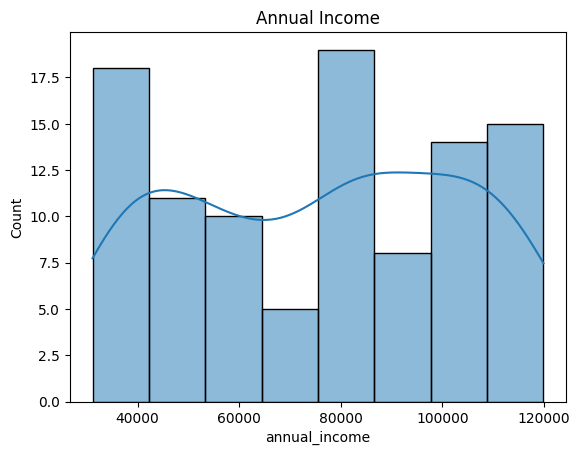

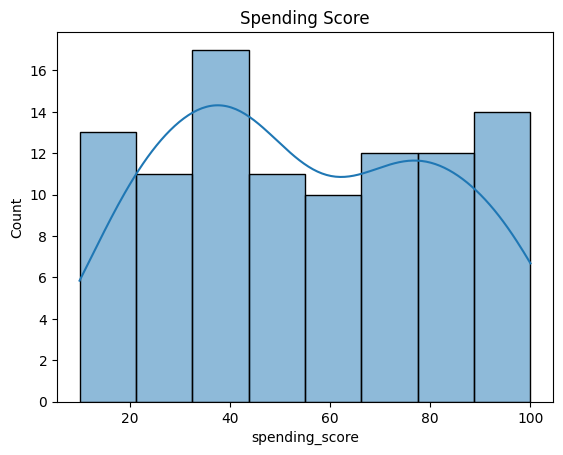


City with highest average spending: HOUSTON


In [4]:
print("Mean:\n", df[['age','annual_income','spending_score']].mean())
print("Median:\n", df[['age','annual_income','spending_score']].median())
print("Mode:\n", df[['age','annual_income','spending_score']].mode().iloc[0])
print("Variance:\n", df[['age','annual_income','spending_score']].var())
print("Std Dev:\n", df[['age','annual_income','spending_score']].std())
print("Range:\n", df[['age','annual_income','spending_score']].max() - df[['age','annual_income','spending_score']].min())
sns.histplot(df['annual_income'], kde=True); plt.title("Annual Income"); plt.show()
sns.histplot(df['spending_score'], kde=True); plt.title("Spending Score"); plt.show()

print("\nCity with highest average spending:",
      df.groupby('city')['spending_score'].mean().idxmax())



**Part C – Probability**

In [5]:
p1 = (df['spending_score'] > 70).mean()
p2 = (df[df['city']=="NEW YORK"]['annual_income'] > 60000).mean()
print("\nP(spending > 70) =", p1)
print("P(income > 60000 | city=NEW YORK) =", p2)



P(spending > 70) = 0.35
P(income > 60000 | city=NEW YORK) = 0.9


**Part D – Linear Algebra**

In [6]:
age = df['age'].values
income = df['annual_income'].values
print("\nDot product =", np.dot(age, income))
print("Norm of income =", np.linalg.norm(income))
print("Normalized income (first 5):", (income/np.linalg.norm(income))[:5])



Dot product = 320139613
Norm of income = 809656.3090960262
Normalized income (first 5): [0.11823041 0.05001134 0.04458929 0.09922235 0.14242339]


**Part E – Calculus**

In [7]:
y = df['spending_score'].values[:10]
y_hat = y + np.random.randint(-5,5,10)
J = ((y - y_hat)**2).sum()/(2*len(y))
grad = (y_hat - y)/len(y)
print("\nCost J(w) =", J)
print("Gradient =", grad)


Cost J(w) = 3.05
Gradient = [-0.4  0.   0.  -0.4  0.4 -0.3  0.1 -0.1  0.1 -0.1]


**Part F – Feature Engineering**

In [8]:
df['avg_spend_per_transaction'] = df['spending_score']/df['num_transactions']
df = pd.get_dummies(df, columns=['city'], drop_first=True)
df[['age','annual_income']] = (df[['age','annual_income']] - df[['age','annual_income']].mean())/df[['age','annual_income']].std()
print("\nFinal DataFrame:\n", df.head())


Final DataFrame:
    customer_id            full_name       age  annual_income  spending_score  \
0         1001         Emily Martin  0.197237       0.705592              73   
1         1002   Patricia Hernandez -1.741419      -1.277839              72   
2         1003       Michael Miller -0.392788      -1.435482              78   
3         1004  Elizabeth Hernandez -0.308499       0.152943              31   
4         1005      Sophia Williams  0.702973       1.408989              76   

   num_transactions  last_purchase_days first_name  avg_spend_per_transaction  \
0                21                  58      Emily                   3.476190   
1                24                  28   Patricia                   3.000000   
2                29                  36    Michael                   2.689655   
3                26                  26  Elizabeth                   1.192308   
4                17                   8     Sophia                   4.470588   

   city_CHICA

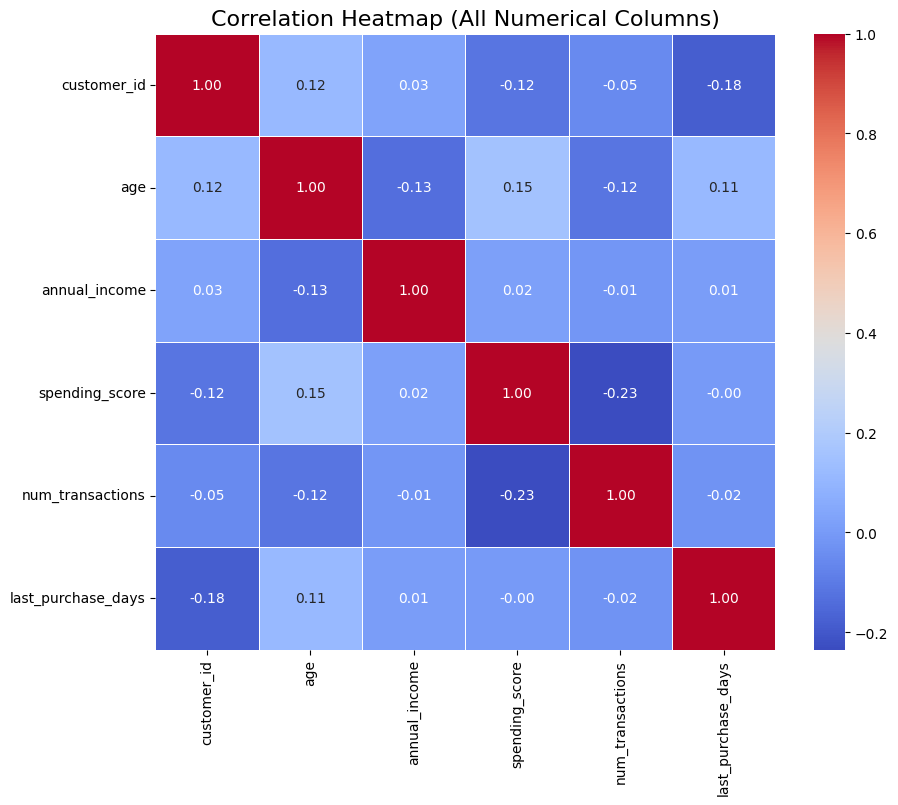

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("customer_data.csv")

# Correlation for all numeric columns
corr = data.corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap (All Numerical Columns)", fontsize=16)
plt.show()


In [11]:
import pandas as pd

# Load dataset
data = pd.read_csv("customer_data.csv")

# Calculate skewness for all numerical columns
skewness = data.skew(numeric_only=True)

print("Skewness of all numerical columns:\n")
print(skewness)


Skewness of all numerical columns:

customer_id           0.000000
age                  -0.404165
annual_income        -0.066712
spending_score        0.130000
num_transactions      0.196367
last_purchase_days   -0.006281
dtype: float64


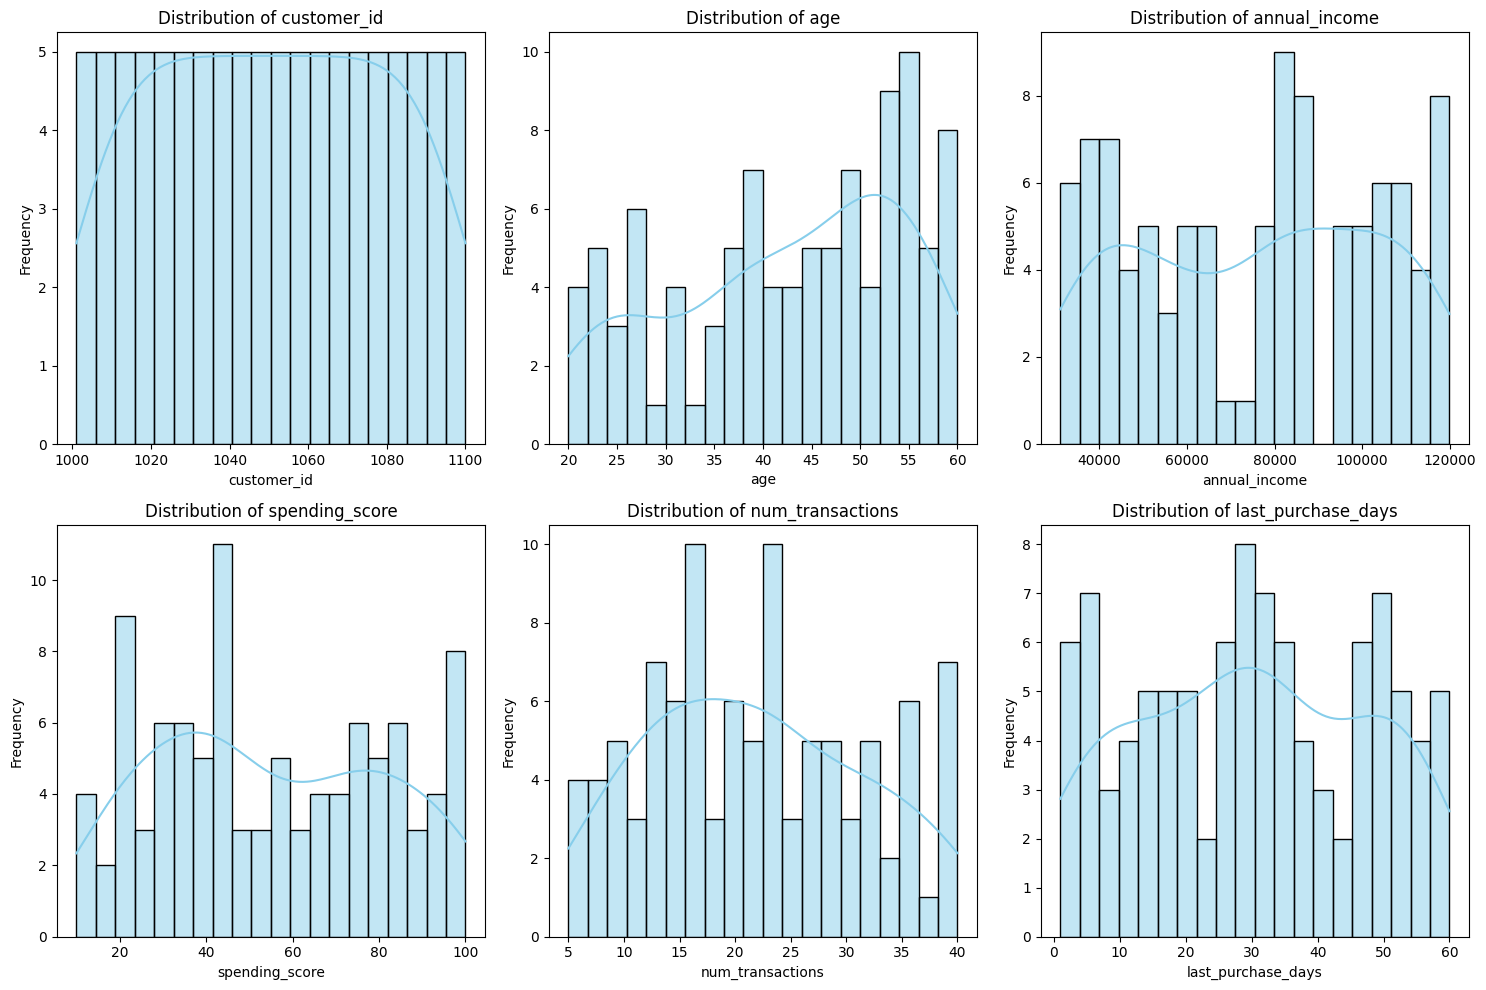

In [12]:
# Load dataset
data = pd.read_csv("customer_data.csv")

# Select numerical columns
num_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Plot distribution (histogram + KDE) for each numerical column
plt.figure(figsize=(15, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)  # Adjust grid (2 rows, 3 columns)
    sns.histplot(data[col], kde=True, bins=20, color="skyblue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()
